### Week 1 practice notebook

Data types & math, lists/arrays/dictionaries, matplotlib

You will need the numpy and matplotlib modules in this notebook; start by importing them

In [1]:
# Add import statements
import numpy as  np
import matplotlib.pyplot as plt

#### **Part 1**
Create variables to store the values of Avogadro's number and the atomic mass of oxygen

In [15]:
Na = 6.022e23 # per mole
O_amu = 16 # g/mol

Use your variables to calculate the number of molecules in 25 grams of O2. Create a new variable with this value.

In [16]:
O2_molec = 25 / (2*O_amu) * Na
O2_molec

4.7046875e+23

Create a string saying "There are __ molecules in 25 grams of O2", where __ is filled in with the correct value.

In [17]:
"There are " + str(O2_molec) + " molecules in 25 grams of O2"

'There are 4.7046875e+23 molecules in 25 grams of O2'

Say you have 3 samples of O2 containing 8, 120, and 844 grams.  Create an array to store these values.

In [118]:
O2_wts = np.array([8,120,844])

Now use the array to calculate the number of moles in each sample, and assign the resulting array to a new variable.

In [ ]:
O2_moles = O2_wts  / (2*O_amu) 
O2_moles

Calculate the mean number of moles in your three O2 samples.

In [ ]:
mean_O2_mole = np.mean(O2_moles)
mean_O2_mole

10.125

#### **Part 2**

You have made spectrophotometry measurements of a sample at 300, 400, 500, and 600 nm wavelengths.  Create an array to store these wavelengths

In [35]:
wls = np.array([300,400,500,600]) # nm

What constants do you need to convert from wavelength to photon energy? Define them here.

In [89]:
hh = 6.626e-34 # J/Hz
cc = 2.9979e8 # m/s

Calculate the photon energy for each wavelength

In [ ]:
wls_m = wls*1e-9 # convert wavelengths from nm to meters
photon_E = hh*cc/wls_m # J
photon_E 

array([6.62136180e-19, 4.96602135e-19, 3.97281708e-19, 3.31068090e-19])

Below is a list containing the measured transmittance values (listed in order of increasing wavelength).  Calculate the absorbance at each wavelength.

In [99]:
trnsmt = [0.81, 0.92, 0.58, 0.87]

In [100]:
abs = -np.log(trnsmt)
abs

array([0.21072103, 0.08338161, 0.54472718, 0.13926207])

Make a plot showing absorbance vs. wavelength. Be sure to label your x and y axes!

Text(0, 0.5, 'Absorbance')

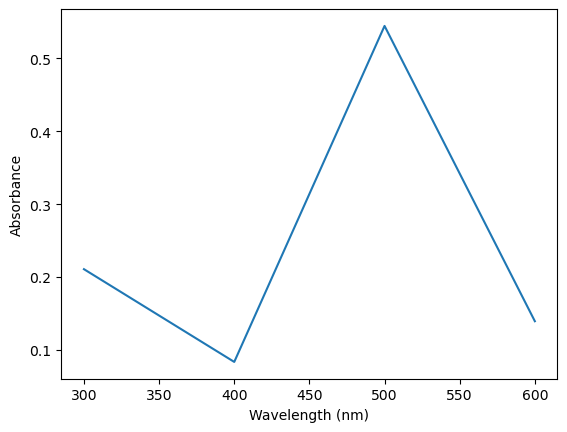

In [101]:
plt.plot(wls, abs)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorbance")

From your list of absorbances, select just the value at 500 nm and store it in a new variable.

In [102]:
# Select absorbance at 500nm
abs_500 = abs[2]
abs_500

0.5447271754416722

Assuming a molar absorptivity of 0.2 M^-1 cm^-1 at 500 nm and a path length of 1 cm, calculate the concentration of your sample.

In [103]:
eps = 0.2 # M^-1 cm^-1
pathlength = 1 # cm

conc = abs_500/(eps*pathlength) # M 
conc 

2.7236358772083604

#### **Part 3**

Create variables to store the atomic mass (amu) of H, C, and O

In [104]:
mass_H = 1
mass_C = 12
mass_O = 16

Use these to calculate the molar masses of the following molecules: CH4, H2O, CH3OH, and C6H6.  Assign the molar massses to new variables.

In [105]:
mass_CH4 = mass_C + 4*mass_H
mass_H2O = mass_O + 2*mass_H 
mass_CH3OH = mass_C + mass_O + 4*mass_H 
mass_C6H6 = 6*mass_C + 6*mass_H

Create a dictionary to associate the name of each molecule with its molar mass.

In [106]:
molec_masses = {'CH4': mass_CH4, 'H2O': mass_H2O, 'CH3OH': mass_CH3OH, 'C6H6': mass_C6H6}
molec_masses

{'CH4': 16, 'H2O': 18, 'CH3OH': 32, 'C6H6': 78}

Print the keys from your newly-made dictionary

In [50]:
molec_masses.keys()

dict_keys(['CH4', 'H2O', 'CH3OH', 'C6H6'])

Calculate the mass of a single CH3OH molecule in kilograms, using your dictionary to find the relevant molar mass

In [115]:
amu_kg = 1 / Na / 1e3 # kg per amu
mCH3OH_kg = molec_masses['CH3OH']*amu_kg

Calculate the time of flight of a singly ionized CH3OH cation through a drift region of 3 meters, assuming a 20 kV acceleration potential.  Be careful to put everything in SI units for your calculation.

In [ ]:
driftlength = 3 # m
voltage = 20 * 1e3 # volts
ee = 1.602e-19 # coulombs
mz = mCH3OH_kg / 1 # mass to charge (kg) for singly ionized molecule

TOF = np.sqrt(mz) * driftlength / np.sqrt(2*ee*voltage)
TOF

8.639080267318308e-06

Print a string saying "The time of flight of methanol is __ milliseconds", where __ contains the correct value

In [47]:
"The time of flight of methanol is " + str(TOF*1e6) + " milliseconds."

'The time of flight of methanol is 8.639080267318308 milliseconds.'

#### **Part 4**

Run the cell below to generate a fake data set for us to work with.

In [83]:
random_data = np.random.normal(8,1,31)

Plot a histogram of the data distribution.  By eye, what do you think the mean value of the data set is?

Text(0, 0.5, 'Counts')

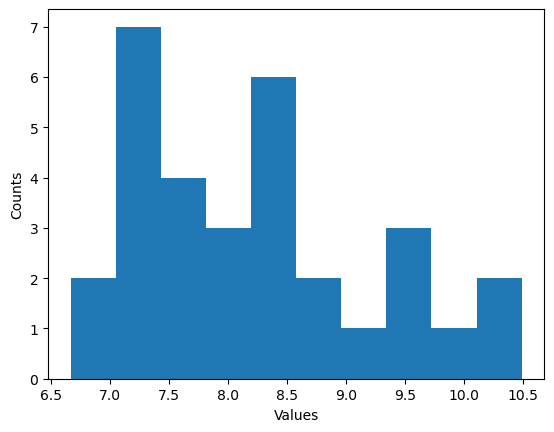

In [87]:
plt.hist(random_data)
plt.xlabel("Values")
plt.ylabel("Counts")

What do you think the different arguments do in the function np.random.normal()?  Try changing the values and see what happens.

Calculate the mean, standard deviation, and number of samples in the data set

In [85]:
mean_data = np.mean(random_data)
std_data = np.std(random_data)
N_data = len(random_data)
print(mean_data)
print(std_data)
print(N_data)

8.231559390388282
1.015877456582468
31


Use these values to calculate the 95% confidence interval for this data set.

In [ ]:
## CI = mean +/- (student_t * std_dev / sqrt(N))
# Define student t for N-1=30 DOF & 95% confidence level
t_95p_30DOF = 2.042

# Calculate interval width
tu = t_95p_30DOF * std_data / np.sqrt(N_data)

# Calculate lower & upper confidence interval
CI_95_low = mean_data - tu 
CI_95_up = mean_data + tu
print(CI_95_low, CI_95_up)

7.858982242513619 8.604136538262946
